In [3]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import pandas as pd
%matplotlib inline
scripts = 'Scripts'
import seaborn as sns
sys.path.append(scripts)
import glob
import numpy as np
pd.options.mode.chained_assignment = None 
import scipy
from scipy import stats
from statsmodels.stats import multitest
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import math
dataDirectory = 'Data/'
sns.set_style("white")
sns.set_style("ticks")

figureDirectory = 'Figures/'
if not os.path.isdir(figureDirectory):
    os.mkdir(figureDirectory)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.size': 12, 'axes.titlesize':'medium',})

In [2]:
data = pd.read_csv(dataDirectory + '240619_NELFValidation.csv')
data = data.groupby(['gRNA','Replicate']).mean().reset_index()
data['IFNL_Cq'] = data['L32'] - data['IFNL']
data['IFNB1_Cq'] = data['L32'] - data['IFNB1']
data['HA_Cq'] = data['L32'] - data['HA']
data['IFNL/L32'] = 2**data['IFNL_Cq']
data['IFNB1/L32'] = 2**data['IFNB1_Cq']
data['HA/L32'] = 2**data['HA_Cq']

nontarget_average_IFNL = data[data.gRNA == 'Non-targeting']['IFNL/L32'].mean()
data['IFNL_norm'] = data['IFNL/L32']/nontarget_average_IFNL
nontarget_average_IFNB1 = data[data.gRNA == 'Non-targeting']['IFNB1/L32'].mean()
data['IFNB1_norm'] = data['IFNB1/L32']/nontarget_average_IFNB1
nontarget_average_HA = data[data.gRNA == 'Non-targeting']['HA/L32'].mean()
data['HA_norm'] = data['HA/L32']/nontarget_average_HA
data

,gRNA,Replicate,IFNL,IFNB1,HA,L32,IFNL_Cq,IFNB1_Cq,HA_Cq,IFNL/L32,IFNB1/L32,HA/L32,IFNL_norm,IFNB1_norm,HA_norm
0,NELFA,1,20.218505,21.804429,16.183774,21.400470,1.181965,-0.403960,5.216696,2.268856,0.755781,37.186219,9.196179,8.198107,4.757964
1,NELFA,2,20.051144,21.407965,16.239001,21.232173,1.181029,-0.175792,4.993172,2.267384,0.885281,31.848914,9.190216,9.602823,4.075057
2,NELFA,3,20.750054,22.341575,17.055871,22.265471,1.515416,-0.076104,5.209599,2.858813,0.948616,37.003741,11.587408,10.289823,4.734616
3,NELFB,1,19.092407,20.383117,15.076491,22.142288,3.049881,1.759171,7.065797,8.281436,3.385036,133.972885,33.566512,36.718156,17.141783
4,NELFB,2,18.861021,20.297882,15.348603,22.102453,3.241432,1.804572,6.753850,9.457322,3.493254,107.922359,38.332639,37.892022,13.808628
5,NELFB,3,19.171151,20.763461,15.602131,22.098779,2.927627,1.335317,6.496648,7.608580,2.523310,90.299617,30.839278,27.370843,11.553804
6,NELFCD,1,21.601321,22.970924,17.022101,21.364209,-0.237111,-1.606715,4.342108,0.848443,0.328345,20.281720,3.438927,3.561626,2.595039
7,NELFCD,2,21.670029,22.583386,17.076723,21.193062,-0.476967,-1.390325,4.116339,0.718487,0.381479,17.343687,2.912187,4.137978,2.219119
8,NELFCD,3,21.479731,22.980646,17.342140,21.182308,-0.297422,-1.798337,3.840169,0.813705,0.287506,14.322075,3.298128,3.118632,1.832504
9,Non-targeting,1,22.966486,24.453233,17.953824,21.277541,-1.688946,-3.175693,3.323716,0.310154,0.110668,10.012402,1.257122,1.200436,1.281083


/tmp/ipykernel_1823236/4122431780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='IFNL_norm', x='gRNA', data=data, palette = ['0.5'], edgecolor='0',
/tmp/ipykernel_1823236/4122431780.py:4: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(y='IFNL_norm', x='gRNA', data=data, palette = ['0.5'], edgecolor='0',


Non-targeting
0.5
NELFB
5.525109316300683e-05
NELFA
0.00018641619435382797
NELFCD
0.00021024656957304124
(array([False,  True,  True,  True]), array([5.00000000e-01, 2.21004373e-04, 2.80328759e-04, 2.80328759e-04]), 0.012741455098566168, 0.0125)


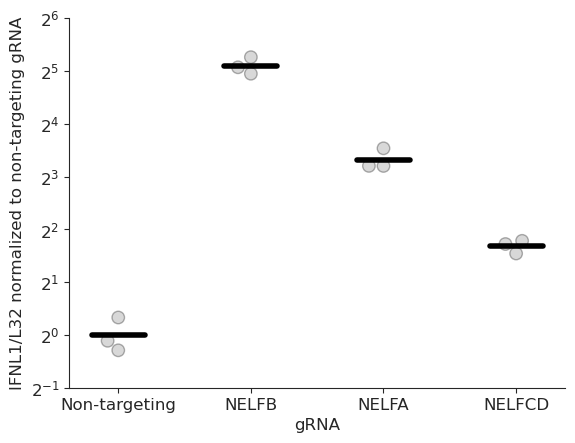

In [3]:
fig, ax = plt.subplots(1,1)
order = ['Non-targeting','NELFB','NELFA','NELFCD']

sns.swarmplot(y='IFNL_norm', x='gRNA', data=data, palette = ['0.5'], edgecolor='0',        
                dodge=False, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.3)

sns.despine()
a = plt.ylabel('IFNL1/L32 normalized to non-targeting gRNA')
plt.yscale('log', base=2)

pvals = []
for position, gRNA, in enumerate(order):
    tstat, pval = stats.ttest_ind(data[data.gRNA == gRNA]['IFNL_norm'], 
                                  data[data.gRNA == "Non-targeting"]['IFNL_norm'], alternative='greater')
    pvals += [pval]
    print(gRNA)
    print(pval)
pvals = multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
print(pvals)
offset = 0
for position, val in enumerate(pvals):
    y = data[data.gRNA == order[position]]['IFNL_norm'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)

plt.ylim(0.5,64)

plt.savefig(figureDirectory + 'NELFVal_IFNL.pdf', bbox_inches="tight")

/tmp/ipykernel_1823236/3141370881.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='IFNB1_norm', x='gRNA', data=data, palette = ['0.5'], edgecolor='0',
/tmp/ipykernel_1823236/3141370881.py:4: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(y='IFNB1_norm', x='gRNA', data=data, palette = ['0.5'], edgecolor='0',


Non-targeting
0.5
NELFB
0.0002914332198246875
NELFA
9.053142007081546e-05
NELFCD
0.0005864740596129844


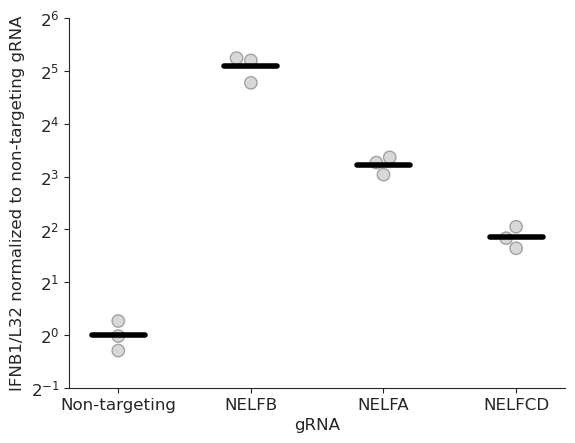

In [4]:
fig, ax = plt.subplots(1,1)
order = ['Non-targeting','NELFB','NELFA','NELFCD']

sns.swarmplot(y='IFNB1_norm', x='gRNA', data=data, palette = ['0.5'], edgecolor='0',        
                dodge=False, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.3)

sns.despine()
a = plt.ylabel('IFNB1/L32 normalized to non-targeting gRNA')
plt.yscale('log', base=2)

pvals = []
for position, gRNA, in enumerate(order):
    tstat, pval = stats.ttest_ind(data[data.gRNA == gRNA]['IFNB1_norm'], 
                                  data[data.gRNA == "Non-targeting"]['IFNB1_norm'], alternative='greater')
    pvals += [pval]
    print(gRNA)
    print(pval)
pvals = multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[0]
offset = 0
for position, val in enumerate(pvals):
    y = data[data.gRNA == order[position]]['IFNB1_norm'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)

plt.ylim(0.5,64)

plt.savefig(figureDirectory + 'NELFVal_IFNB1.pdf', bbox_inches="tight")

In [35]:
data = pd.read_csv(dataDirectory + '231117_NELF_NS1stopflu.csv')
data = data.drop('Target', axis=1)
data = data.groupby(['Virus','siRNA','Replicate']).mean().reset_index()
data['IFNB1_Cq'] = data['L32'] - data['IFNB']
data['HA_Cq'] = data['L32'] - data['HA']
data['NELFB_Cq'] = data['L32'] - data['NELFB']
data['IFNB1/L32'] = 2**data['IFNB1_Cq']
data['HA/L32'] = 2**data['HA_Cq']
data['NELFB/L32'] = 2**data['NELFB_Cq']
data

,Virus,siRNA,Replicate,Technical_Replicate_qPCR,IFNB,HA,NELFB,L32,IFNB1_Cq,HA_Cq,NELFB_Cq,IFNB1/L32,HA/L32,NELFB/L32
0,WSN-NS1stop,NELFB-1,1,1.5,18.301997,12.983852,28.958762,22.156147,3.854150,9.172295,-6.802615,14.461551,576.946990,0.008958
1,WSN-NS1stop,NELFB-1,2,1.5,18.202077,12.775941,28.105910,22.138276,3.936199,9.362334,-5.967634,15.307842,658.178222,0.015979
2,WSN-NS1stop,NELFB-1,3,1.5,18.845956,13.473166,28.264613,22.206569,3.360613,8.733402,-6.058045,10.271769,425.614114,0.015009
3,WSN-NS1stop,NELFB-1,4,1.5,18.796186,13.687238,27.909032,22.102757,3.306571,8.415519,-5.806274,9.894120,341.447329,0.017871
4,WSN-NS1stop,NELFB-2,1,1.5,20.707352,14.715384,28.120146,22.160594,1.453242,7.445211,-5.959552,2.738228,174.273669,0.016069
5,WSN-NS1stop,NELFB-2,2,1.5,20.851856,14.667625,28.159286,22.132147,1.280291,7.464523,-6.027139,2.428880,176.622182,0.015334
6,WSN-NS1stop,NELFB-2,3,1.5,21.091488,14.734591,28.344324,22.175454,1.083966,7.440863,-6.168870,2.119855,173.749241,0.013899
7,WSN-NS1stop,NELFB-2,4,1.5,20.745416,14.711291,27.510440,21.967962,1.222546,7.256671,-5.542478,2.333581,152.923977,0.021456
8,WSN-NS1stop,NTC,1,1.5,22.291163,15.603584,24.269161,22.316293,0.025130,6.712709,-1.952868,1.017571,104.888226,0.258302
9,WSN-NS1stop,NTC,2,1.5,21.839384,15.356534,23.902189,21.949131,0.109747,6.592597,-1.953058,1.079039,96.509360,0.258268


/tmp/ipykernel_1823236/1092876479.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='IFNB1/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',
/tmp/ipykernel_1823236/1092876479.py:5: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(y='IFNB1/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',


0.0072458305476830465


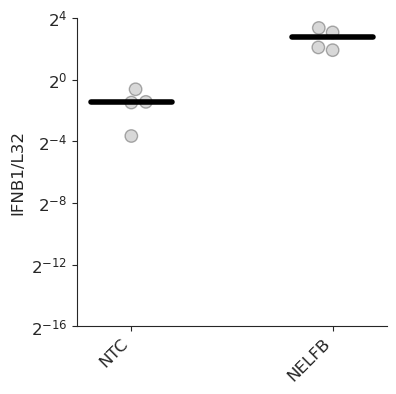

In [42]:
graph = data[data.Virus == 'WSN_PR8-NS1stop'].reset_index(drop=True) #This is NS1mut virus
fig, ax = plt.subplots(1,1,figsize=[4,4])
order = ['NTC', 'NELFB-1']

sns.swarmplot(y='IFNB1/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',        
                dodge=False, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.3)

sns.despine()
a = plt.xticks(rotation=45, ha='right')
a = plt.ylabel('IFNB1/L32')
a = plt.xlabel('siRNA')
plt.yscale('log', base=2)

tstat, pval = stats.ttest_ind(graph[graph.siRNA == 'NELFB-1']['IFNB1/L32'], graph[graph.siRNA == 'NTC']['IFNB1/L32'])
print(pval)
for position, treatment, in enumerate(order):
    y = graph[graph.siRNA == order[position]]['IFNB1/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)

a = plt.xlabel('')
displayNames = ['NTC', 'NELFB']
a =plt.xticks(np.arange(0,2,1),displayNames)

a =plt.yticks(np.logspace(start=-16,stop=4,num=6,base=2))
plt.ylim(2**(-16), 2**4)

plt.savefig(figureDirectory + 'WSN-PR8-NS1stop_IFNB1.pdf', bbox_inches="tight")

/tmp/ipykernel_1823236/3497192827.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='NELFB/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',
/tmp/ipykernel_1823236/3497192827.py:5: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(y='NELFB/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',


0.0001559681776260009


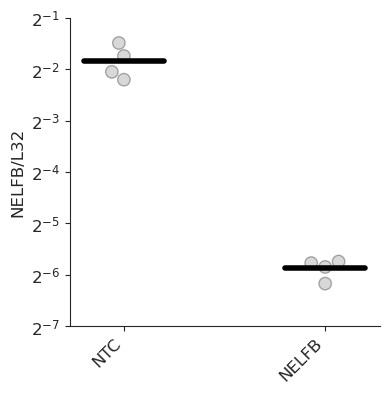

In [43]:
graph = data[data.Virus == 'WSN_PR8-NS1stop'].reset_index(drop=True)
fig, ax = plt.subplots(1,1,figsize=[4,4])
order = ['NTC', 'NELFB-1']

sns.swarmplot(y='NELFB/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',        
                dodge=False, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.3)

sns.despine()
a = plt.xticks(rotation=45, ha='right')
a = plt.ylabel('NELFB/L32')
a = plt.xlabel('siRNA')
plt.yscale('log', base=2)

tstat, pval = stats.ttest_ind(graph[graph.siRNA == 'NELFB-1']['NELFB/L32'], graph[graph.siRNA == 'NTC']['NELFB/L32'])
print(pval)
for position, treatment, in enumerate(order):
    y = graph[graph.siRNA == order[position]]['NELFB/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)

a = plt.xlabel('')
displayNames = ['NTC', 'NELFB']
a =plt.xticks(np.arange(0,2,1),displayNames)
plt.ylim(2**(-7), 2**(-1))

plt.savefig(figureDirectory + 'WSN-PR8-NS1stop_NELFB.pdf', bbox_inches="tight")

/tmp/ipykernel_1823236/585287197.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='HA/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',
/tmp/ipykernel_1823236/585287197.py:5: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(y='HA/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',


0.0003372664606981466


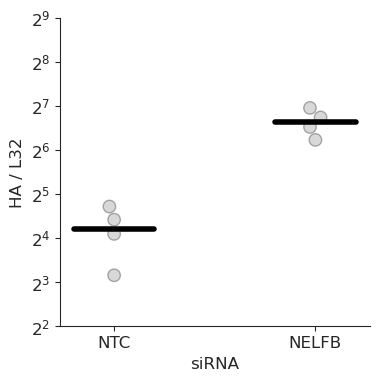

In [44]:
graph = data[data.Virus == 'WSN_PR8-NS1stop'].reset_index(drop=True)
fig, ax = plt.subplots(1,1,figsize=[4,4])
order = ['NTC', 'NELFB-1']

sns.swarmplot(y='HA/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',        
                dodge=False, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.3)

sns.despine()
a = plt.ylabel('HA / L32')
a = plt.xlabel('siRNA')
plt.yscale('log', base=2)

tstat, pval = stats.ttest_ind(graph[graph.siRNA == 'NELFB-1']['HA/L32'], graph[graph.siRNA == 'NTC']['HA/L32'])
print(pval)
for position, treatment, in enumerate(order):
    y = graph[graph.siRNA == order[position]]['HA/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)
    
a = plt.xlabel('siRNA')
displayNames = ['NTC', 'NELFB']
a =plt.xticks(np.arange(0,2,1),displayNames)
plt.ylim(4,2**9)

plt.savefig(figureDirectory + 'WSN-PR8-NS1stop_HA.pdf', bbox_inches="tight")

/tmp/ipykernel_1823236/2534218647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='IFNB1/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',
/tmp/ipykernel_1823236/2534218647.py:5: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(y='IFNB1/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',


0.00017785896326798873


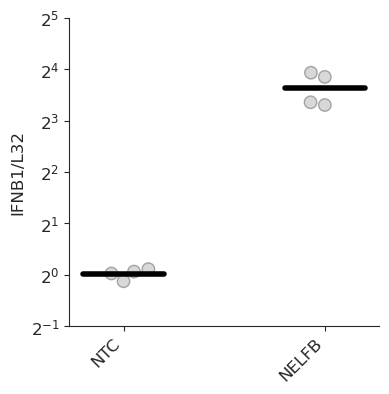

In [45]:
graph = data[data.Virus == 'WSN-NS1stop'].reset_index(drop=True) #This is NS1stop virus (fully WSN background)
fig, ax = plt.subplots(1,1,figsize=[4,4])
order = ['NTC', 'NELFB-1']

sns.swarmplot(y='IFNB1/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',        
                dodge=False, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.3)

sns.despine()
a = plt.xticks(rotation=45, ha='right')
a = plt.ylabel('IFNB1/L32')
a = plt.xlabel('siRNA')
plt.yscale('log', base=2)

tstat, pval = stats.ttest_ind(graph[graph.siRNA == 'NELFB-1']['IFNB1/L32'], graph[graph.siRNA == 'NTC']['IFNB1/L32'])
print(pval)
for position, treatment, in enumerate(order):
    y = graph[graph.siRNA == order[position]]['IFNB1/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)

a = plt.xlabel('')
displayNames = ['NTC', 'NELFB']
a =plt.xticks(np.arange(0,2,1),displayNames)
plt.ylim(2**(-1), 2**5)

plt.savefig(figureDirectory + 'WSN-NS1stop_IFNB1.pdf', bbox_inches="tight")

/tmp/ipykernel_1823236/421995484.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='NELFB/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',
/tmp/ipykernel_1823236/421995484.py:5: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(y='NELFB/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',


1.3170080688605492e-08


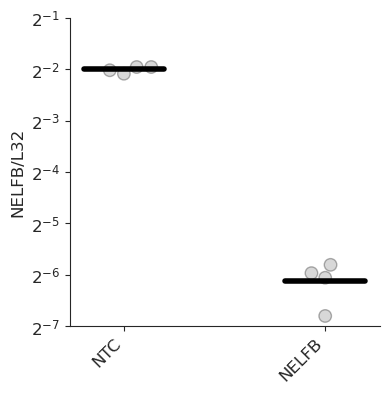

In [46]:
graph = data[data.Virus == 'WSN-NS1stop'].reset_index(drop=True)
fig, ax = plt.subplots(1,1,figsize=[4,4])
order = ['NTC', 'NELFB-1']

sns.swarmplot(y='NELFB/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',        
                dodge=False, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.3)

sns.despine()
a = plt.xticks(rotation=45, ha='right')
a = plt.ylabel('NELFB/L32')
a = plt.xlabel('siRNA')
plt.yscale('log', base=2)

tstat, pval = stats.ttest_ind(graph[graph.siRNA == 'NELFB-1']['NELFB/L32'], graph[graph.siRNA == 'NTC']['NELFB/L32'])
print(pval)
for position, treatment, in enumerate(order):
    y = graph[graph.siRNA == order[position]]['NELFB/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)

a = plt.xlabel('')
displayNames = ['NTC', 'NELFB']
a =plt.xticks(np.arange(0,2,1),displayNames)
plt.ylim(2**(-7), 2**(-1))

plt.savefig(figureDirectory + 'WSN-NS1stop_NELFB.pdf', bbox_inches="tight")

/tmp/ipykernel_1823236/3285666332.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='HA/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',
/tmp/ipykernel_1823236/3285666332.py:5: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(y='HA/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',


0.001358411535797838


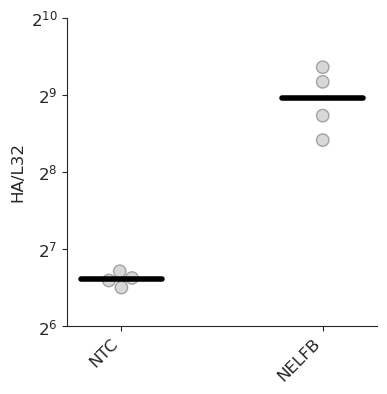

In [47]:
graph = data[data.Virus == 'WSN-NS1stop'].reset_index(drop=True)
fig, ax = plt.subplots(1,1,figsize=[4,4])
order = ['NTC', 'NELFB-1']

sns.swarmplot(y='HA/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',        
                dodge=False, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.3)

sns.despine()
a = plt.xticks(rotation=45, ha='right')
a = plt.ylabel('HA/L32')
a = plt.xlabel('siRNA')
plt.yscale('log', base=2)

tstat, pval = stats.ttest_ind(graph[graph.siRNA == 'NELFB-1']['HA/L32'], graph[graph.siRNA == 'NTC']['HA/L32'])
print(pval)
for position, treatment, in enumerate(order):
    y = graph[graph.siRNA == order[position]]['HA/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)

a = plt.xlabel('')
displayNames = ['NTC', 'NELFB']
a =plt.xticks(np.arange(0,2,1),displayNames)
plt.ylim(2**6, 2**10)

plt.savefig(figureDirectory + 'WSN-NS1stop_HA.pdf', bbox_inches="tight")

In [4]:
data = pd.read_csv(dataDirectory + '240327_NELF_WTflu.csv')
data = data.groupby(['Virus','siRNA','Replicate']).mean().reset_index()
data['IFNB1_dCq'] = data['L32'] - data['IFNB']
data['HA_dCq'] = data['L32'] - data['HA']
data['NELFB_dCq'] = data['L32'] - data['NELFB']
data['IFNB1/L32'] = 2**data['IFNB1_dCq']
data['HA/L32'] = 2**data['HA_dCq']
data['NELFB/L32'] = 2**data['NELFB_dCq']
data

,Virus,siRNA,Replicate,IFNB,HA,NELFB,L32,IFNB1_dCq,HA_dCq,NELFB_dCq,IFNB1/L32,HA/L32,NELFB/L32
0,WT,NTC,1,30.439903,16.437842,24.650392,22.068300,-8.371604,5.630458,-2.582092,0.003019,49.537803,0.166999
1,WT,NTC,2,31.364042,16.864476,25.438681,22.386758,-8.977284,5.522282,-3.051923,0.001984,45.959200,0.120581
2,WT,NTC,3,31.135399,17.622103,24.364082,22.011669,-9.123730,4.389566,-2.352413,0.001793,20.959986,0.195818
3,WT,si1,1,27.806740,13.807142,27.231226,22.367797,-5.438943,8.560655,-4.863429,0.023052,377.584291,0.034353
4,WT,si1,2,27.554904,13.951237,28.299073,22.255921,-5.298983,8.304684,-6.043152,0.025401,316.197870,0.015165
5,WT,si1,3,27.690558,13.949222,29.212319,22.439706,-5.250853,8.490484,-6.772613,0.026262,359.658587,0.009146


/tmp/ipykernel_2603528/3668371208.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='IFNB1/L32', x='siRNA', data=data_WT, palette = ['0.5'], edgecolor='0',
/tmp/ipykernel_2603528/3668371208.py:5: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(y='IFNB1/L32', x='siRNA', data=data_WT, palette = ['0.5'], edgecolor='0',


2.556274309991437e-05


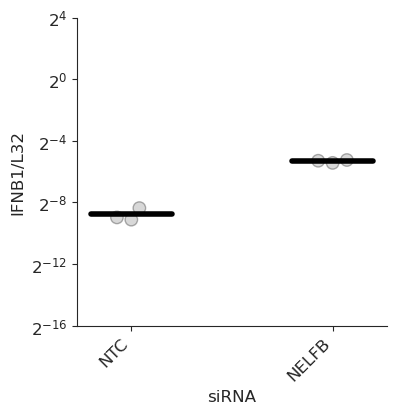

In [5]:
data_WT = data[data['Virus']=='WT'] #This is WT WSN
fig, ax = plt.subplots(1,1,figsize=[4,4])
order = ['NTC', 'si1']

sns.swarmplot(y='IFNB1/L32', x='siRNA', data=data_WT, palette = ['0.5'], edgecolor='0',        
                dodge=False, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.3)

sns.despine()
a = plt.xticks(rotation=45, ha='right')
a = plt.ylabel('IFNB1/L32')
plt.yscale('log', base=2)

plt.ylim(2**(-9.5),2**(-4.5))

tstat, pval = stats.ttest_ind(data_WT[data_WT.siRNA == 'si1']['IFNB1/L32'], data_WT[data_WT.siRNA == 'NTC']['IFNB1/L32'])
print(pval)
for position, treatment, in enumerate(order):
    y = data_WT[data_WT.siRNA == order[position]]['IFNB1/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)

displayNames = ['NTC', 'NELFB']
a =plt.xticks(np.arange(0,2,1),displayNames)
a =plt.yticks(np.logspace(start=-16,stop=4,num=6,base=2))
plt.ylim(2**(-16), 2**4)

plt.savefig(figureDirectory + 'WT_IFNB1.pdf', bbox_inches="tight")

/tmp/ipykernel_2603528/594957638.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='NELFB/L32', x='siRNA', data=data_WT, palette = ['0.5'], edgecolor='0',
/tmp/ipykernel_2603528/594957638.py:5: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(y='NELFB/L32', x='siRNA', data=data_WT, palette = ['0.5'], edgecolor='0',


0.0036465615655184606


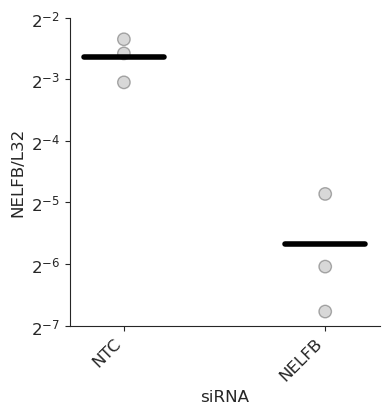

In [6]:
data_WT = data[data['Virus']=='WT']
fig, ax = plt.subplots(1,1,figsize=[4,4])
order = ['NTC', 'si1']

sns.swarmplot(y='NELFB/L32', x='siRNA', data=data_WT, palette = ['0.5'], edgecolor='0',        
                dodge=False, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.3)

sns.despine()
a = plt.xticks(rotation=45, ha='right')
a = plt.ylabel('NELFB/L32')
plt.yscale('log', base=2)

tstat, pval = stats.ttest_ind(data_WT[data_WT.siRNA == 'si1']['NELFB/L32'], data_WT[data_WT.siRNA == 'NTC']['NELFB/L32'])
print(pval)
for position, treatment, in enumerate(order):
    y = data_WT[data_WT.siRNA == order[position]]['NELFB/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)

displayNames = ['NTC', 'NELFB']
a =plt.xticks(np.arange(0,2,1),displayNames)
plt.ylim(2**(-7),2**(-2))

plt.savefig(figureDirectory + 'WT_NELFB.pdf', bbox_inches="tight")

/tmp/ipykernel_2603528/4281881154.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='HA/L32', x='siRNA', data=data_WT, palette = ['0.5'], edgecolor='0',
/tmp/ipykernel_2603528/4281881154.py:5: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(y='HA/L32', x='siRNA', data=data_WT, palette = ['0.5'], edgecolor='0',


0.00010454988758698502


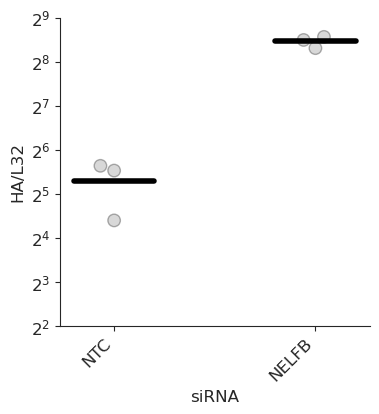

In [7]:
data_WT = data[data['Virus']=='WT']
fig, ax = plt.subplots(1,1,figsize=[4,4])
order = ['NTC', 'si1']

sns.swarmplot(y='HA/L32', x='siRNA', data=data_WT, palette = ['0.5'], edgecolor='0',        
                dodge=False, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.3)

sns.despine()
a = plt.xticks(rotation=45, ha='right')
a = plt.ylabel('HA/L32')
plt.yscale('log', base=2)


plt.ylim(2**2,2**9)

tstat, pval = stats.ttest_ind(data_WT[data_WT.siRNA == 'si1']['HA/L32'], data_WT[data_WT.siRNA == 'NTC']['HA/L32'])
print(pval)
for position, treatment, in enumerate(order):
    y = data_WT[data_WT.siRNA == order[position]]['HA/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)

displayNames = ['NTC', 'NELFB']
a =plt.xticks(np.arange(0,2,1),displayNames)

plt.savefig(figureDirectory + 'WT_HA.pdf', bbox_inches="tight")

In [8]:
data = pd.read_csv(dataDirectory + '240910_NELFB_uninf_polyIC.csv')
data = data.groupby(['Treatment','siRNA','Replicate']).mean().reset_index()
data['NELFB_Cq'] = data['L32'] - data['NELFB']
data['NELFB/L32'] = 2**data['NELFB_Cq']
data['IFNB1_Cq'] = data['L32'] - data['IFNB1']
data['IFNB1/L32'] = 2**data['IFNB1_Cq']
data

,Treatment,siRNA,Replicate,NELFB,IFNB1,L32,NELFB_Cq,NELFB/L32,IFNB1_Cq,IFNB1/L32
0,polyIC,NELFB,1,27.713837,19.625712,21.946366,-5.767471,0.018358,2.320654,4.995588
1,polyIC,NELFB,2,27.462099,19.411657,21.886331,-5.575768,0.020967,2.474674,5.558417
2,polyIC,NELFB,3,27.595046,19.094916,21.847307,-5.747739,0.018611,2.752390,6.738327
3,polyIC,NTC,1,23.620821,19.336741,21.758020,-1.862801,0.274942,2.421278,5.356455
4,polyIC,NTC,2,23.894847,19.718064,22.044658,-1.850189,0.277356,2.326595,5.016199
5,polyIC,NTC,3,23.688464,19.286168,21.652268,-2.036196,0.243806,2.366100,5.155455
6,uninfected,NELFB,1,27.415655,NaN,21.870628,-5.545027,0.021418,NaN,NaN
7,uninfected,NELFB,2,27.543077,34.424601,22.156932,-5.386145,0.023912,-12.267669,0.000203
8,uninfected,NELFB,3,27.300606,32.999983,21.963079,-5.337527,0.024731,-11.036903,0.000476
9,uninfected,NTC,1,23.278156,33.372327,21.866995,-1.411162,0.376009,-11.505333,0.000344


/tmp/ipykernel_2603528/1744091102.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='IFNB1/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',
/tmp/ipykernel_2603528/1744091102.py:5: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(y='IFNB1/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',


0.4031176091669863


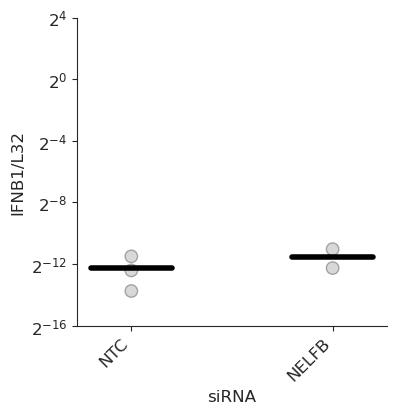

In [10]:
graph = data[data.Treatment == 'uninfected']
fig, ax = plt.subplots(1,1,figsize=[4,4])
order = ['NTC', 'NELFB']

sns.swarmplot(y='IFNB1/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',        
                dodge=False, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.3)

sns.despine()
a = plt.xticks(rotation=45, ha='right')
a = plt.ylabel('IFNB1/L32')
plt.yscale('log', base=2)


a =plt.yticks(np.logspace(start=-16,stop=4,num=6,base=2))
plt.ylim(2**(-16), 2**4)

tstat, pval = stats.ttest_ind(graph[graph.siRNA == 'NELFB']['IFNB1/L32'], graph[graph.siRNA == 'NTC']['IFNB1/L32'],
                             nan_policy = 'omit')
print(pval)
for position, treatment, in enumerate(order):
    y = graph[graph.siRNA == order[position]]['IFNB1/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)

plt.savefig(figureDirectory + 'NELFB-siRNA_uninfected_IFNB1.pdf', bbox_inches="tight")

/tmp/ipykernel_2603528/393061181.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='NELFB/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',
/tmp/ipykernel_2603528/393061181.py:5: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(y='NELFB/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',


2.5555025857096807e-05


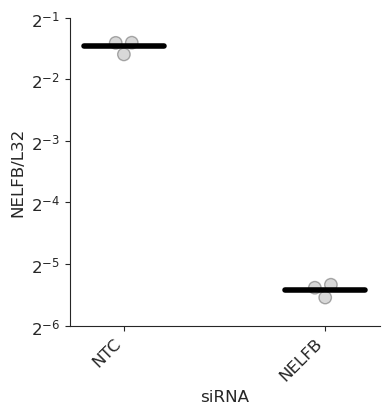

In [12]:
graph = data[data.Treatment == 'uninfected']
fig, ax = plt.subplots(1,1,figsize=[4,4])
order = ['NTC', 'NELFB']

sns.swarmplot(y='NELFB/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',        
                dodge=False, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.3)

sns.despine()
a = plt.xticks(rotation=45, ha='right')
a = plt.ylabel('NELFB/L32')
plt.yscale('log', base=2)


plt.ylim(2**(-6),2**(-1))

tstat, pval = stats.ttest_ind(graph[graph.siRNA == 'NELFB']['NELFB/L32'], graph[graph.siRNA == 'NTC']['NELFB/L32'])
print(pval)
for position, treatment, in enumerate(order):
    y = graph[graph.siRNA == order[position]]['NELFB/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)

plt.savefig(figureDirectory + 'NELFB-siRNA_uninfected_NELFB.pdf', bbox_inches="tight")

/tmp/ipykernel_2603528/2546108299.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='IFNB1/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',
/tmp/ipykernel_2603528/2546108299.py:5: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(y='IFNB1/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',


0.32366401772749154


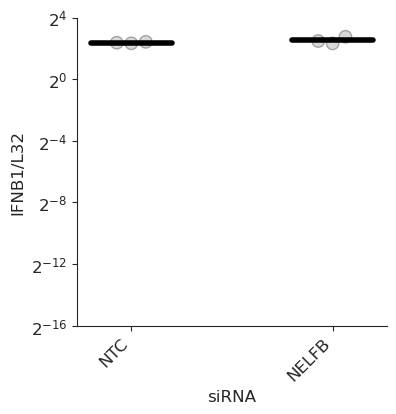

In [13]:
graph = data[data.Treatment == 'polyIC']
fig, ax = plt.subplots(1,1,figsize=[4,4])
order = ['NTC', 'NELFB']

sns.swarmplot(y='IFNB1/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',        
                dodge=False, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.3)

sns.despine()
a = plt.xticks(rotation=45, ha='right')
a = plt.ylabel('IFNB1/L32')
plt.yscale('log', base=2)
a =plt.yticks(np.logspace(start=-16,stop=4,num=6,base=2))
plt.ylim(2**(-16), 2**4)

tstat, pval = stats.ttest_ind(graph[graph.siRNA == 'NELFB']['IFNB1/L32'], graph[graph.siRNA == 'NTC']['IFNB1/L32'])
print(pval)
for position, treatment, in enumerate(order):
    y = graph[graph.siRNA == order[position]]['IFNB1/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)

plt.savefig(figureDirectory + 'NELFB-siRNA_polyIC_IFNB1.pdf', bbox_inches="tight")

/tmp/ipykernel_2603528/511655570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='NELFB/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',
/tmp/ipykernel_2603528/511655570.py:5: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(y='NELFB/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',


2.2274530073853965e-05


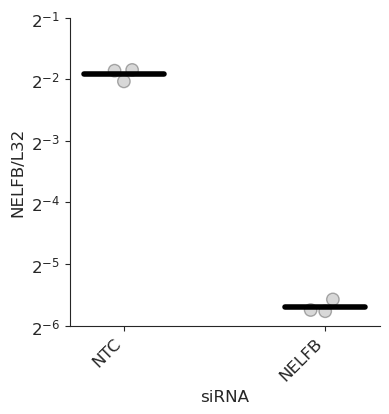

In [14]:
graph = data[data.Treatment == 'polyIC']
fig, ax = plt.subplots(1,1,figsize=[4,4])
order = ['NTC', 'NELFB']

sns.swarmplot(y='NELFB/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',        
                dodge=False, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.3)

sns.despine()
a = plt.xticks(rotation=45, ha='right')
a = plt.ylabel('NELFB/L32')
plt.yscale('log', base=2)


plt.ylim(2**(-6),2**(-1))

tstat, pval = stats.ttest_ind(graph[graph.siRNA == 'NELFB']['NELFB/L32'], graph[graph.siRNA == 'NTC']['NELFB/L32'])
print(pval)
for position, treatment, in enumerate(order):
    y = graph[graph.siRNA == order[position]]['NELFB/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)

plt.savefig(figureDirectory + 'NELFB-siRNA_polyIC_NELFB.pdf', bbox_inches="tight")

In [12]:
data = pd.read_csv(dataDirectory + '241018_PB1d4_Balox.csv')
data = data.groupby(['siRNA','Baloxavir','Replicate']).mean().reset_index()
data['IFNB1_dCq'] = data['L32'] - data['IFNB1']
data['HA_dCq'] = data['L32'] - data['HA']
data['NELFB_dCq'] = data['L32'] - data['NELFB']
data['IFNB1/L32'] = 2**data['IFNB1_dCq']
data['HA/L32'] = 2**data['HA_dCq']
data['NELFB/L32'] = 2**data['NELFB_dCq']
data

,siRNA,Baloxavir,Replicate,NELFB,IFNB1,HA,L32,IFNB1_dCq,HA_dCq,NELFB_dCq,IFNB1/L32,HA/L32,NELFB/L32
0,NELFB,No,1,29.514910,28.063945,16.961092,22.592121,-5.471824,5.631029,-6.922789,0.022533,49.557406,0.008242
1,NELFB,No,2,29.400179,27.818978,17.033458,22.424291,-5.394687,5.390833,-6.975888,0.023770,41.956794,0.007944
2,NELFB,No,3,29.373616,28.024840,17.068378,22.627827,-5.397013,5.559449,-6.745789,0.023732,47.158595,0.009318
3,NELFB,Yes,1,28.205714,25.769387,19.509969,21.954593,-3.814794,2.444624,-6.251121,0.071061,5.443838,0.013129
4,NELFB,Yes,2,28.009070,25.669423,19.567098,22.143008,-3.526414,2.575910,-5.866061,0.086785,5.962469,0.017145
5,NELFB,Yes,3,28.718938,25.980599,19.408503,22.261504,-3.719094,2.853001,-6.457434,0.075935,7.225017,0.011379
6,NTC,No,1,24.182622,27.412436,17.664993,22.181287,-5.231150,4.516294,-2.001335,0.026624,22.884418,0.249769
7,NTC,No,2,24.013963,27.157056,17.657049,22.208658,-4.948398,4.551609,-1.805305,0.032388,23.451509,0.286121
8,NTC,No,3,24.042267,27.347413,17.919478,22.291278,-5.056135,4.371800,-1.750989,0.030057,20.703461,0.297098
9,NTC,Yes,1,23.575165,27.674236,19.941610,22.074457,-5.599779,2.132847,-1.500709,0.020620,4.385820,0.353380


No
0.0005682250367389857
22.34646251439177
46.22426492279181
Yes
0.06550781866129438
4.630545486824318
6.210441206988844
(array([ True, False]), array([0.00113645, 0.06550782]), 0.025320565519103555, 0.025)


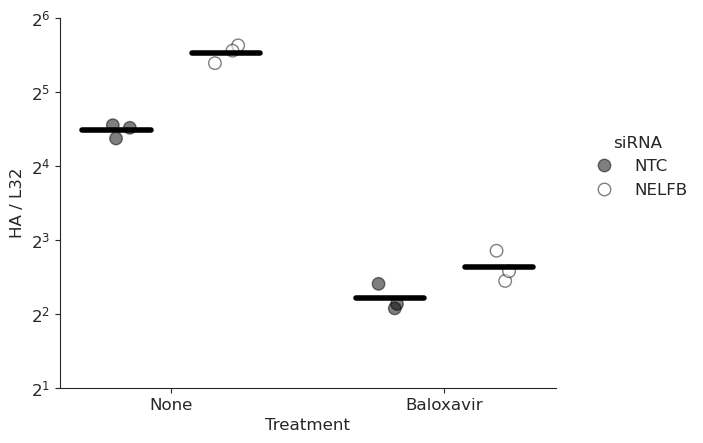

In [14]:
graph = data
order = ['No','Yes']
nameOrder = ['None','Baloxavir']
ax=sns.stripplot(x='Baloxavir', y='HA/L32', data=graph,  edgecolor='black', order = order,
            jitter=True, dodge=True, linewidth=1, s=9, hue='siRNA', hue_order=['NTC','NELFB'], palette = ['0','1'], alpha = 0.5)

sns.despine()
handles, labels = ax.get_legend_handles_labels()
plt.xlabel('siRNA')
ax.legend(handles[0:2], ['NTC','NELFB'], bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.,frameon=False, title='siRNA')

plt.ylabel('HA / L32')
plt.xlabel('Treatment')
a =plt.xticks(np.arange(0,2,1),nameOrder)
plt.yscale('log', base=2)

pvals = []

for position, treatment in enumerate(order):
    curr = graph[graph['Baloxavir'] == treatment]
    tstat, pval = stats.ttest_ind(curr[curr.siRNA == 'NELFB']['HA/L32'], curr[curr.siRNA == 'NTC']['HA/L32'])
    pvals = pvals + [pval]
    print(treatment)
    print(pval)
    y = curr[curr.siRNA == 'NTC']['HA/L32'].mean()
    plt.plot([position-0.325, position-0.075], [y, y], lw=4, c='k', zorder=9)
    print(y)
    y = curr[curr.siRNA == 'NELFB']['HA/L32'].mean()
    print(y)
    plt.plot([position+0.075, position+0.325], [y, y], lw=4, c='k', zorder=9)
pvals = multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
print(pvals)

plt.ylim(2,64)
plt.savefig('Figures/Balox_PB1d4_HA.pdf', format='pdf', bbox_inches = "tight")

No
4.702516433496341e-05
0.2776624643171744
0.0085013377042843
Yes
1.335895681490146e-08
0.35491154148904974
0.013884420979182424
(array([ True,  True]), array([4.70251643e-05, 2.67179136e-08]), 0.025320565519103555, 0.025)


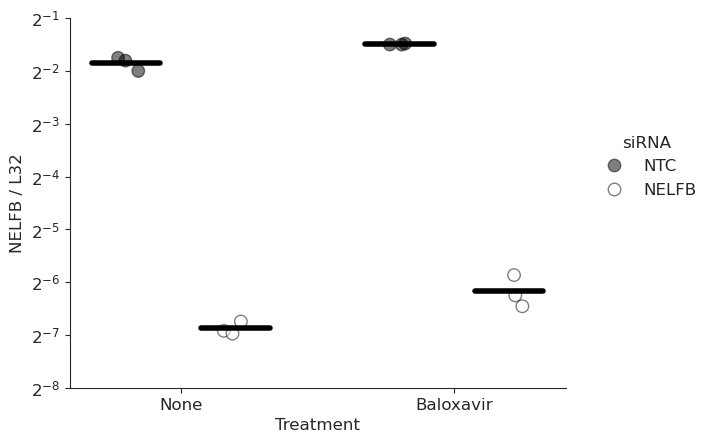

In [15]:
graph = data
order = ['No','Yes']
nameOrder = ['None','Baloxavir']
ax=sns.stripplot(x='Baloxavir', y='NELFB/L32', data=graph,  edgecolor='black', order = order,
            jitter=True, dodge=True, linewidth=1, s=9, hue='siRNA', hue_order=['NTC','NELFB'], palette = ['0','1'], alpha = 0.5)

sns.despine()
handles, labels = ax.get_legend_handles_labels()
plt.xlabel('siRNA')
ax.legend(handles[0:2], ['NTC','NELFB'], bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.,frameon=False, title='siRNA')

plt.ylabel('NELFB / L32')
plt.xlabel('Treatment')
a =plt.xticks(np.arange(0,2,1),nameOrder)
plt.yscale('log', base=2)

pvals = []

for position, treatment in enumerate(order):
    curr = graph[graph['Baloxavir'] == treatment]
    tstat, pval = stats.ttest_ind(curr[curr.siRNA == 'NELFB']['NELFB/L32'], curr[curr.siRNA == 'NTC']['NELFB/L32'])
    pvals = pvals + [pval]
    print(treatment)
    print(pval)
    y = curr[curr.siRNA == 'NTC']['NELFB/L32'].mean()
    plt.plot([position-0.325, position-0.075], [y, y], lw=4, c='k', zorder=9)
    print(y)
    y = curr[curr.siRNA == 'NELFB']['NELFB/L32'].mean()
    print(y)
    plt.plot([position+0.075, position+0.325], [y, y], lw=4, c='k', zorder=9)
pvals = multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
print(pvals)

plt.ylim(2**(-8),0.5)
plt.savefig('Figures/Balox_PB1d4_NELFB.pdf', format='pdf', bbox_inches = "tight")

In [2]:
data = pd.read_csv(dataDirectory + '230925_NELF_caplength.csv')
data = data.groupby(['siRNA','Replicate']).mean().reset_index()
data['IFNB1_Cq'] = data['L32'] - data['IFNB1']
data['HA_Cq'] = data['L32'] - data['HA']
data['NELFB_Cq'] = data['L32'] - data['NELFB']
data['IFNL1_Cq'] = data['L32'] - data['IFNL1']
data['IFNB1/L32'] = 2**data['IFNB1_Cq']
data['HA/L32'] = 2**data['HA_Cq']
data['NELFB/L32'] = 2**data['NELFB_Cq']
data['IFNL1/L32'] = 2**data['IFNL1_Cq']
data

,siRNA,Day,Replicate,NELFB,HA,IFNB1,IFNL1,L32,IFNB1_Cq,HA_Cq,NELFB_Cq,IFNL1_Cq,IFNB1/L32,HA/L32,NELFB/L32,IFNL1/L32
0,NELFB-1,8,1,27.250066,14.579527,19.250446,17.972270,21.321494,2.071049,6.741967,-5.928571,3.349225,4.201920,107.037076,0.016418,10.191006
1,NELFB-1,8,2,26.968898,13.877078,18.990212,17.588954,21.346911,2.356698,7.469832,-5.621988,3.757957,5.121968,177.273391,0.020305,13.528751
2,NELFB-1,11,1,27.187099,13.946136,17.673046,16.122977,21.470897,3.797851,7.524762,-5.716201,5.347921,13.908080,184.153090,0.019022,40.727205
3,NELFB-1,11,2,26.889838,13.577498,17.597375,16.026628,21.420276,3.822901,7.842778,-5.469562,5.393648,14.151675,229.568101,0.022568,42.038750
4,NELFB-2,8,1,27.116279,15.195091,19.802486,18.963210,21.285628,1.483142,6.090537,-5.830651,2.322419,2.795569,68.145054,0.017571,5.001701
5,NELFB-2,8,2,27.220292,15.515679,20.123709,19.267222,21.375830,1.252120,5.860150,-5.844462,2.108608,2.381913,58.087283,0.017404,4.312749
6,NELFB-2,11,1,25.351168,15.573598,19.891300,18.478069,22.039034,2.147734,6.465436,-3.312134,3.560965,4.431312,88.367024,0.100681,11.802047
7,NELFB-2,11,2,24.781593,14.665873,18.993747,17.635130,21.313167,2.319421,6.647294,-3.468426,3.678037,4.991317,100.238575,0.090344,12.799687
8,NTC,8,1,22.866865,19.086405,25.031472,23.131258,21.297456,-3.734016,2.211050,-1.569409,-1.833802,0.075153,4.630123,0.336946,0.280524
9,NTC,8,2,22.609707,18.280984,24.268939,22.672118,21.324494,-2.944444,3.043510,-1.285213,-1.347624,0.129907,8.244944,0.410310,0.392939


/tmp/ipykernel_2332216/2047690645.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='IFNB1/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',
/tmp/ipykernel_2332216/2047690645.py:6: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(y='IFNB1/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',


NTC
0.3307304333577873
NELFB-1
0.01086912340050153
NELFB-1
0.010062024943488204
NELFB-2
0.008704176881472406
NELFB-2
0.0069683484909215596
[False  True  True  True  True]


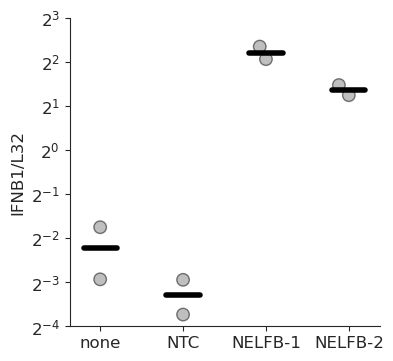

In [8]:
fig, ax = plt.subplots(1,1,figsize=[4,4])
order = ['none', 'NTC', 'NELFB-1', 'NELFB-2']

sns.swarmplot(y='IFNB1/L32', x='siRNA', data=data, palette = ['0.5'], edgecolor='0',        
                dodge=False, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.5)

sns.despine()
a = plt.ylabel('IFNB1/L32')
a = plt.xlabel('siRNA')
plt.yscale('log', base=2)

pvals = []
for position, treatment, in enumerate(order):
    if position > 0:
        tstat, pval = stats.ttest_ind(data[data.siRNA == treatment]['IFNB1/L32'], data[data.siRNA == 'none']['IFNB1/L32'])
        pvals += [pval]
        print(treatment)
        print(pval)
    if position > 1:
        tstat, pval = stats.ttest_ind(data[data.siRNA == treatment]['IFNB1/L32'], data[data.siRNA == 'NTC']['IFNB1/L32'])
        pvals += [pval]
        print(treatment)
        print(pval)
    y = data[data.siRNA == order[position]]['IFNB1/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)
pvals = multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[0]
print(pvals)

a = plt.xlabel('')
a =plt.xticks(np.arange(0,4,1),order)
plt.ylim(2**(-4), 2**3)

plt.savefig(figureDirectory + 'caplength_IFNB1.pdf', bbox_inches="tight")

/tmp/ipykernel_2332216/1848115290.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='HA/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',
/tmp/ipykernel_2332216/1848115290.py:5: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(y='HA/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',


NTC
0.45157489634458237
NELFB-1
0.06395987353579197
NELFB-1
0.06105024873329814
NELFB-2
0.011545667331205885
NELFB-2
0.008772449459810889
(array([False, False, False,  True,  True]), array([0.4515749 , 0.07994984, 0.07994984, 0.02886417, 0.02886417]), 0.010206218313011495, 0.01)


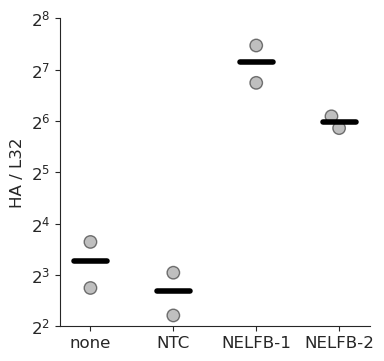

In [11]:
fig, ax = plt.subplots(1,1,figsize=[4,4])
order = ['none', 'NTC', 'NELFB-1', 'NELFB-2']

sns.swarmplot(y='HA/L32', x='siRNA', data=data, palette = ['0.5'], edgecolor='0',        
                dodge=False, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.5)

sns.despine()
a = plt.ylabel('HA / L32')
a = plt.xlabel('siRNA')
plt.yscale('log', base=2)

pvals = []
for position, treatment, in enumerate(order):
    if position > 0:
        tstat, pval = stats.ttest_ind(data[data.siRNA == treatment]['HA/L32'], data[data.siRNA == 'none']['HA/L32'])
        pvals += [pval]
        print(treatment)
        print(pval)
    if position > 1:
        tstat, pval = stats.ttest_ind(data[data.siRNA == treatment]['HA/L32'], data[data.siRNA == 'NTC']['HA/L32'])
        pvals += [pval]
        print(treatment)
        print(pval)
    y = data[data.siRNA == order[position]]['HA/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)
pvals = multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
print(pvals)

a = plt.xlabel('')
a =plt.xticks(np.arange(0,4,1),order)
plt.ylim(2**2, 2**8)

plt.savefig(figureDirectory + 'caplength_HA.pdf', bbox_inches="tight")

/tmp/ipykernel_2332216/916682470.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='NELFB/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',
/tmp/ipykernel_2332216/916682470.py:5: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(y='NELFB/L32', x='siRNA', data=graph, palette = ['0.5'], edgecolor='0',


NTC
0.6691002821153911
NELFB-1
0.002514626835815869
NELFB-1
0.010522464956411652
NELFB-2
0.002476613143347238
NELFB-2
0.010442860558442648
(array([False,  True,  True,  True,  True]), array([0.66910028, 0.00628657, 0.01315308, 0.00628657, 0.01315308]), 0.010206218313011495, 0.01)


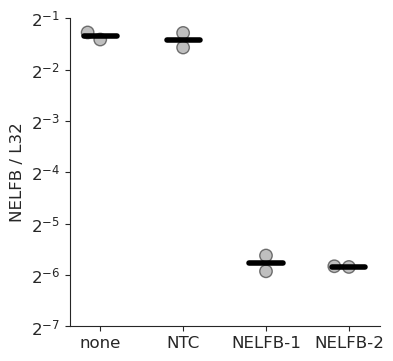

In [13]:
fig, ax = plt.subplots(1,1,figsize=[4,4])
order = ['none', 'NTC', 'NELFB-1', 'NELFB-2']

sns.swarmplot(y='NELFB/L32', x='siRNA', data=data, palette = ['0.5'], edgecolor='0',        
                dodge=False, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.5)

sns.despine()
a = plt.ylabel('NELFB / L32')
a = plt.xlabel('siRNA')
plt.yscale('log', base=2)

pvals = []
for position, treatment, in enumerate(order):
    if position > 0:
        tstat, pval = stats.ttest_ind(data[data.siRNA == treatment]['NELFB/L32'], data[data.siRNA == 'none']['NELFB/L32'])
        pvals += [pval]
        print(treatment)
        print(pval)
    if position > 1:
        tstat, pval = stats.ttest_ind(data[data.siRNA == treatment]['NELFB/L32'], data[data.siRNA == 'NTC']['NELFB/L32'])
        pvals += [pval]
        print(treatment)
        print(pval)
    y = data[data.siRNA == order[position]]['NELFB/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)
pvals = multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
print(pvals)

a = plt.xlabel('')
a =plt.xticks(np.arange(0,4,1),order)
plt.ylim(2**(-7), 2**-1)

plt.savefig(figureDirectory + 'caplength_NELFB.pdf', bbox_inches="tight")

In [16]:
data = pd.read_csv(dataDirectory + '240314_NCBP1_PB1d4.csv')
data = data.groupby(['siRNA','Replicate']).mean().reset_index()
data['IFNB1_Cq'] = data['L32'] - data['IFN']
data['HA_Cq'] = data['L32'] - data['HA']
data['IFNB1/L32'] = 2**data['IFNB1_Cq']
data['HA/L32'] = 2**data['HA_Cq']
data

,Treatment,siRNA,Replicate,L32,IFN,HA,IFNB1_Cq,HA_Cq,IFNB1/L32,HA/L32
0,PB1d4,NCBP1,1,22.40,31.01,19.66,-8.61,2.74,0.002559,6.680703
1,PB1d4,NCBP1,2,22.65,31.02,19.98,-8.37,2.67,0.003023,6.364292
2,PB1d4,NCBP1,3,23.24,31.37,20.71,-8.13,2.53,0.003570,5.775717
3,PB1d4,NTC,1,21.67,31.53,21.35,-9.86,0.32,0.001076,1.248331
4,PB1d4,NTC,2,21.14,30.88,20.52,-9.74,0.62,0.001169,1.536875
5,PB1d4,NTC,3,21.29,32.89,20.54,-11.60,0.75,0.000322,1.681793
6,polyIC,NCBP1,1,21.92,28.23,36.24,-6.31,-14.32,0.012604,0.000049
7,polyIC,NCBP1,2,22.17,28.33,35.06,-6.16,-12.89,0.013985,0.000132
8,polyIC,NCBP1,3,23.00,28.80,NaN,-5.80,NaN,0.017948,NaN
9,polyIC,NTC,1,21.47,27.43,NaN,-5.96,NaN,0.016064,NaN


In [ ]:
fig, ax = plt.subplots(1,1)
order = ['NTC', 'NCBP1']

sns.swarmplot(y='HA/L32', x='siRNA', data=data, palette = ['0.5'], edgecolor='0',        
                dodge=False, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.3)

sns.despine()
a = plt.ylabel('HA / L32')
plt.yscale('log', base=2)
plt.ylim(2**0,2**3)

a = plt.xlabel('siRNA')
displayNames = ['Non-targeting', 'NCBP1']
a =plt.xticks(np.arange(0,2,1),displayNames)

tstat, pval = stats.ttest_ind(data[data.siRNA == 'NCBP1']['HA/L32'], data[data.siRNA == 'NTC']['HA/L32'])
print(pval)
for position, siRNA, in enumerate(order):
    y = data[data.siRNA == order[position]]['HA/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)

plt.savefig(figureDirectory + 'NCBP1_PB1d4_HA.pdf', bbox_inches="tight")

In [17]:
data = pd.read_csv(dataDirectory + '241017_NELFB_titer.csv')
data = data.groupby(['siRNA','Replicate']).mean().reset_index()
data['Cells_IFNB1_dCq'] = data['Cells_L32'] - data['Cells_IFNB1']
data['Cells_HA_dCq'] = data['Cells_L32'] - data['Cells_HA']
data['Cells_PA_dCq'] = data['Cells_L32'] - data['Cells_PA']
data['Cells_NELFB_dCq'] = data['Cells_L32'] - data['Cells_NELFB']
data['Cells_IFNB1/L32'] = 2**data['Cells_IFNB1_dCq']
data['Cells_HA/L32'] = 2**data['Cells_HA_dCq']
data['Cells_PA/L32'] = 2**data['Cells_HA_dCq']
data['Cells_NELFB/L32'] = 2**data['Cells_NELFB_dCq']
data['Cells_HA_lin'] = 2**(-data['Cells_HA'])
data['Cells_PA_lin'] = 2**(-data['Cells_PA'])
data['Sup_HA_lin'] = 2**(-data['Sup_HA'])
data['Sup_PA_lin'] = 2**(-data['Sup_PA'])
sup_HA_normfactor = data[data.siRNA == 'NTC']['Sup_HA_lin'].mean()
sup_PA_normfactor = data[data.siRNA == 'NTC']['Sup_PA_lin'].mean()
cells_HA_normfactor = data[data.siRNA == 'NTC']['Cells_HA_lin'].mean()
cells_PA_normfactor = data[data.siRNA == 'NTC']['Cells_PA_lin'].mean()
data['Sup_HA_norm'] = data['Sup_HA_lin'] /  sup_HA_normfactor
data['Sup_PA_norm'] = data['Sup_PA_lin'] /  sup_PA_normfactor
data['Cells_HA_norm'] = data['Cells_HA_lin'] /  cells_HA_normfactor
data['Cells_PA_norm'] = data['Cells_PA_lin'] /  cells_PA_normfactor

graph = data[['siRNA','Replicate','Sup_HA_norm','Sup_PA_norm','Cells_HA_norm','Cells_PA_norm']]
graph = pd.melt(graph, id_vars=['siRNA', 'Replicate'], value_vars=['Sup_HA_norm','Sup_PA_norm','Cells_HA_norm','Cells_PA_norm'], var_name='transcript', value_name='transcript/NTC')
graph

,siRNA,Replicate,transcript,transcript/NTC
0,NELFB,1,Sup_HA_norm,0.456891
1,NELFB,2,Sup_HA_norm,0.623658
2,NELFB,3,Sup_HA_norm,0.388504
3,NTC,1,Sup_HA_norm,0.946558
4,NTC,2,Sup_HA_norm,1.524729
5,NTC,3,Sup_HA_norm,0.528713
6,NELFB,1,Sup_PA_norm,0.497588
7,NELFB,2,Sup_PA_norm,0.610134
8,NELFB,3,Sup_PA_norm,0.560105
9,NTC,1,Sup_PA_norm,1.098891


Sup_HA_norm
0.16097846964970647
Sup_PA_norm
0.16849279525599026
Cells_HA_norm
0.15916572153935915
Cells_PA_norm
0.8921548699411641


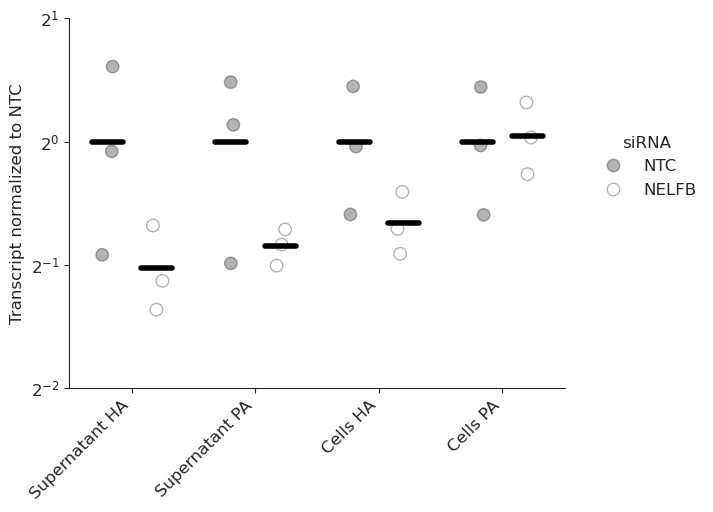

In [18]:
order = ['Sup_HA_norm','Sup_PA_norm','Cells_HA_norm','Cells_PA_norm']
nameOrder = ['Supernatant HA','Supernatant PA','Cells HA','Cells PA']
ax=sns.stripplot(x='transcript', y='transcript/NTC', data=graph,  edgecolor='black', order = order,
            jitter=True, dodge=True, linewidth=1, s=9, hue='siRNA', hue_order=['NTC','NELFB'],palette=['0','1'], alpha = 0.3)

sns.despine()
handles, labels = ax.get_legend_handles_labels()
plt.xlabel('')
ax.legend(handles[0:2], ['NTC','NELFB'], bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.,frameon=False, title='siRNA')

plt.ylabel('Transcript normalized to NTC')
a =plt.xticks(np.arange(0,4,1),nameOrder,rotation=45, ha='right')
plt.yscale('log', base=2)

pvals = []
for position, rna, in enumerate(order):
    curr = graph[graph['transcript'] == rna]
    tstat, pval = stats.ttest_ind(curr[curr.siRNA == 'NTC']['transcript/NTC'], curr[curr.siRNA == 'NELFB']['transcript/NTC'])
    pvals = pvals + [pval]
    print(rna)
    print(pval)
    pvals = multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[0]
    offset = 0
    y = curr[curr.siRNA == 'NTC']['transcript/NTC'].mean()
    plt.plot([position-0.325, position-0.075], [y, y], lw=4, c='k', zorder=9)
    y = curr[curr.siRNA == 'NELFB']['transcript/NTC'].mean()
    plt.plot([position+0.075, position+0.325], [y, y], lw=4, c='k', zorder=9)   

plt.ylim(2**(-2),2)
plt.savefig('Figures/viraltiter_14hrs.pdf', format='pdf', bbox_inches = "tight")

/tmp/ipykernel_1823236/1584754090.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.stripplot(x='siRNA', y='Cells_NELFB/L32', data=graph2,  edgecolor='black', order = order,


0.007161189361178568


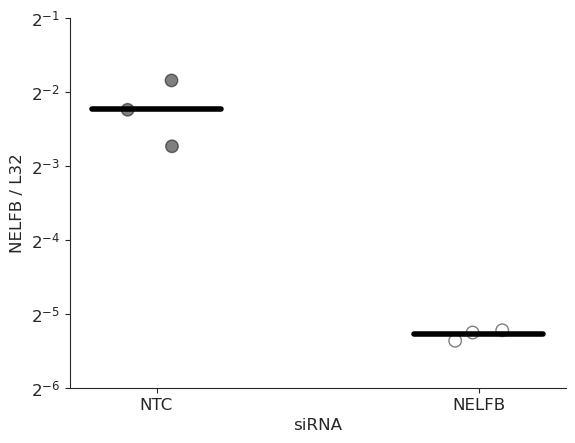

In [19]:
graph2 = data[['siRNA','Replicate','Cells_NELFB/L32']]
order = ['NTC','NELFB']
ax=sns.stripplot(x='siRNA', y='Cells_NELFB/L32', data=graph2,  edgecolor='black', order = order,
            linewidth=1, s=9, palette=['0','1'], alpha = 0.5)

sns.despine()

plt.ylabel('NELFB / L32')
plt.yscale('log', base=2)

tstat, pval = stats.ttest_ind(graph2[graph2.siRNA == 'NELFB']['Cells_NELFB/L32'], graph2[graph2.siRNA == 'NTC']['Cells_NELFB/L32'])
print(pval)
for position, treatment, in enumerate(order):
    y = graph2[graph2.siRNA == order[position]]['Cells_NELFB/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)

plt.ylim(2**(-6),2**(-1))
plt.savefig('Figures/viraltiter_14hrs-NELFB.pdf', format='pdf', bbox_inches = "tight")

In [21]:
data = pd.read_csv(dataDirectory + '241021_NS1mut_Balox_WT-RKO.csv')
data = data.groupby(['Cells','siRNA','Baloxavir','Replicate']).mean().reset_index()
data['Treatment'] = data.siRNA + data.Baloxavir
data['IFNB1_dCq'] = data['L32'] - data['IFNB1']
data['HA_dCq'] = data['L32'] - data['HA']
data['NELFB_dCq'] = data['L32'] - data['NELFB']
data['IFNB1/L32'] = 2**data['IFNB1_dCq']
data['HA/L32'] = 2**data['HA_dCq']
data['NELFB/L32'] = 2**data['NELFB_dCq']
data

,Cells,siRNA,Baloxavir,Replicate,NELFB,IFNB1,HA,L32,Treatment,IFNB1_dCq,HA_dCq,NELFB_dCq,IFNB1/L32,HA/L32,NELFB/L32
0,A549,NELFB,No,1,29.099259,18.841517,14.869405,21.951922,NELFBNo,3.110405,7.082517,-7.147337,8.636252,135.534534,0.007054
1,A549,NELFB,No,2,28.620001,18.890968,14.962761,21.768842,NELFBNo,2.877873,6.806081,-6.851159,7.350658,111.901141,0.008662
2,A549,NELFB,No,3,28.388786,18.938256,14.778929,21.729863,NELFBNo,2.791608,6.950934,-6.658922,6.924010,123.719955,0.009896
3,A549,NELFB,Yes,1,28.139980,27.969072,23.766825,21.820112,NELFBYes,-6.148960,-1.946713,-6.319869,0.014092,0.259407,0.012518
4,A549,NELFB,Yes,2,28.282548,27.532348,23.602469,21.969855,NELFBYes,-5.562493,-1.632614,-6.312693,0.021160,0.322503,0.012580
5,A549,NELFB,Yes,3,28.571286,27.981637,23.417548,21.884639,NELFBYes,-6.096999,-1.532909,-6.686648,0.014609,0.345580,0.009708
6,A549,NTC,No,1,23.700628,22.045157,17.228230,21.809063,NTCNo,-0.236094,4.580833,-1.891564,0.849041,23.931405,0.269515
7,A549,NTC,No,2,23.650912,21.620543,17.012142,21.782895,NTCNo,0.162352,4.770752,-1.868017,1.119110,27.298549,0.273950
8,A549,NTC,No,3,23.561456,22.364024,17.523005,21.920350,NTCNo,-0.443674,4.397344,-1.641106,0.735260,21.073301,0.320611
9,A549,NTC,Yes,1,23.586212,29.141417,24.204861,21.656002,NTCYes,-7.485415,-2.548859,-1.930210,0.005580,0.170890,0.262391


No
0.00014606905535631117
24.10108497034102
123.71854349652746
Yes
0.01791180127747711
0.18838162318363824
0.30916320840802064
(array([ True,  True]), array([0.00029214, 0.0179118 ]), 0.025320565519103555, 0.025)


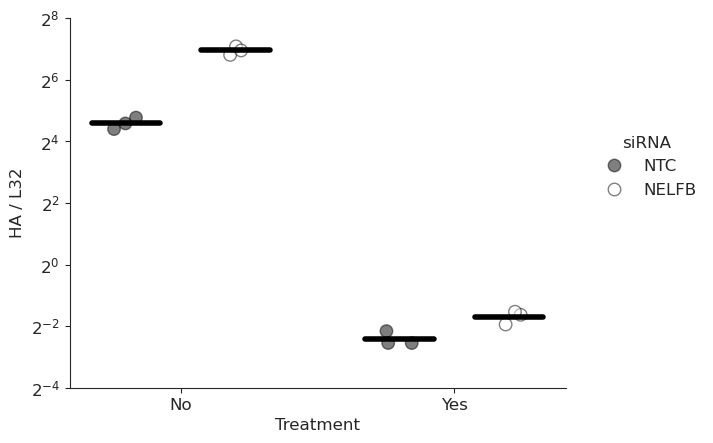

In [24]:
graph = data[data.Cells == 'A549']
order = ['No','Yes']
nameOrder = ['None','Baloxavir']
ax=sns.stripplot(x='Baloxavir', y='HA/L32', data=graph,  edgecolor='black', order = order,
            jitter=True, dodge=True, linewidth=1, s=9, hue='siRNA', hue_order=['NTC','NELFB'], palette = ['0','1'], alpha = 0.5)

sns.despine()
handles, labels = ax.get_legend_handles_labels()
#plt.xlabel('siRNA')
ax.legend(handles[0:2], ['NTC', 'NELFB'], bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.,frameon=False, title='siRNA')

plt.ylabel('HA / L32')
plt.xlabel('Treatment')
a =plt.xticks(np.arange(0,2,1), order)
plt.yscale('log', base=2)

pvals = []
for position, treat in enumerate(order):
    curr = graph[graph['Baloxavir'] == treat]
    tstat, pval = stats.ttest_ind(curr[curr.siRNA == 'NELFB']['HA/L32'], curr[curr.siRNA == 'NTC']['HA/L32'])
    pvals = pvals + [pval]
    print(treat)
    print(pval)
    y = curr[curr.siRNA == 'NTC']['HA/L32'].mean()
    print(y)
    plt.plot([position-0.325, position-0.075], [y, y], lw=4, c='k', zorder=9)
    y = curr[curr.siRNA == 'NELFB']['HA/L32'].mean()
    print(y)
    plt.plot([position+0.075, position+0.325], [y, y], lw=4, c='k', zorder=9)
pvals = multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
print(pvals)

plt.ylim(2**(-4),2**(8))
plt.savefig('Figures/RIGI_WT_Balox_NS1stop_HA.pdf', format='pdf', bbox_inches = "tight")

No
0.00021598375532398342
0.901136803738085
7.636973563539059
Yes
0.008856522269703144
0.00571139886638525
0.01662051335581248
(array([ True,  True]), array([0.00043197, 0.00885652]), 0.025320565519103555, 0.025)


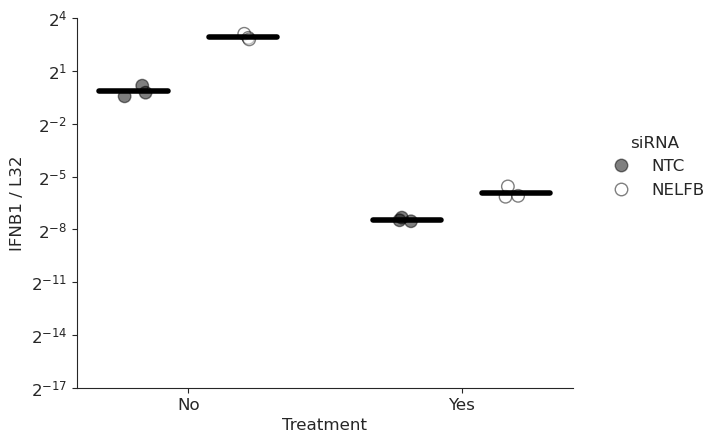

In [22]:
graph = data[data.Cells == 'A549']
order = ['No','Yes']
ax=sns.stripplot(x='Baloxavir', y='IFNB1/L32', data=graph,  edgecolor='black', order = order,
            jitter=True, dodge=True, linewidth=1, s=9, hue='siRNA', hue_order=['NTC','NELFB'], palette = ['0','1'], alpha = 0.5)

sns.despine()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:2], ['NTC', 'NELFB'], bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.,frameon=False, title='siRNA')

plt.ylabel('IFNB1 / L32')
plt.xlabel('Treatment')
a =plt.xticks(np.arange(0,2,1), order)
plt.yscale('log', base=2)

pvals = []
for position, treat in enumerate(order):
    curr = graph[graph['Baloxavir'] == treat]
    tstat, pval = stats.ttest_ind(curr[curr.siRNA == 'NELFB']['IFNB1/L32'], curr[curr.siRNA == 'NTC']['IFNB1/L32'])
    pvals = pvals + [pval]
    print(treat)
    print(pval)
    y = curr[curr.siRNA == 'NTC']['IFNB1/L32'].mean()
    plt.plot([position-0.325, position-0.075], [y, y], lw=4, c='k', zorder=9)
    print(y)
    y = curr[curr.siRNA == 'NELFB']['IFNB1/L32'].mean()
    print(y)
    plt.plot([position+0.075, position+0.325], [y, y], lw=4, c='k', zorder=9)
pvals = multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
print(pvals)

plt.ylim(2**(-17),2**(4))
plt.savefig('Figures/RIGI_WT_Balox_NS1stop_IFNB1.pdf', format='pdf', bbox_inches = "tight")

In [ ]:
graph = data[data.Cells == 'A549']
order = ['No','Yes']
ax=sns.stripplot(x='Baloxavir', y='NELFB/L32', data=graph,  edgecolor='black', order = order,
            jitter=True, dodge=True, linewidth=1, s=9, hue='siRNA', hue_order=['NTC','NELFB'], palette = ['0','1'], alpha = 0.5)

sns.despine()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:2], ['NTC', 'NELFB'], bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.,frameon=False, title='siRNA')

plt.ylabel('NELFB / L32')
plt.xlabel('Treatment')
a =plt.xticks(np.arange(0,2,1), order)
plt.yscale('log', base=2)

pvals = []
for position, treat in enumerate(order):
    curr = graph[graph['Baloxavir'] == treat]
    tstat, pval = stats.ttest_ind(curr[curr.siRNA == 'NELFB']['NELFB/L32'], curr[curr.siRNA == 'NTC']['NELFB/L32'])
    pvals = pvals + [pval]
    print(treat)
    print(pval)
    y = curr[curr.siRNA == 'NTC']['NELFB/L32'].mean()
    plt.plot([position-0.325, position-0.075], [y, y], lw=4, c='k', zorder=9)
    print(y)
    y = curr[curr.siRNA == 'NELFB']['NELFB/L32'].mean()
    print(y)
    plt.plot([position+0.075, position+0.325], [y, y], lw=4, c='k', zorder=9)
pvals = multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
print(pvals)

plt.ylim(2**(-8),2**(-1))
plt.savefig('Figures/RIGI_WT_Balox_NS1stop_NELFB.pdf', format='pdf', bbox_inches = "tight")

In [ ]:
graph = data[data.Cells == 'RKO']
order = ['No','Yes']
nameOrder = ['None','Baloxavir']
ax=sns.stripplot(x='Baloxavir', y='HA/L32', data=graph,  edgecolor='black', order = order,
            jitter=True, dodge=True, linewidth=1, s=9, hue='siRNA', hue_order=['NTC','NELFB'], palette = ['0','1'], alpha = 0.5)

sns.despine()
handles, labels = ax.get_legend_handles_labels()
#plt.xlabel('siRNA')
ax.legend(handles[0:2], ['NTC', 'NELFB'], bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.,frameon=False, title='siRNA')

plt.ylabel('HA / L32')
plt.xlabel('Treatment')
a =plt.xticks(np.arange(0,2,1), order)
plt.yscale('log', base=2)

pvals = []
for position, treat in enumerate(order):
    curr = graph[graph['Baloxavir'] == treat]
    tstat, pval = stats.ttest_ind(curr[curr.siRNA == 'NELFB']['HA/L32'], curr[curr.siRNA == 'NTC']['HA/L32'])
    pvals = pvals + [pval]
    print(treat)
    print(pval)
    y = curr[curr.siRNA == 'NTC']['HA/L32'].mean()
    print(y)
    plt.plot([position-0.325, position-0.075], [y, y], lw=4, c='k', zorder=9)
    y = curr[curr.siRNA == 'NELFB']['HA/L32'].mean()
    print(y)
    plt.plot([position+0.075, position+0.325], [y, y], lw=4, c='k', zorder=9)
pvals = multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
print(pvals)

plt.ylim(2**(-4),2**(8))
plt.savefig('Figures/RIGI_RKO_Balox_NS1stop_HA.pdf', format='pdf', bbox_inches = "tight")

No
0.011556620659732727
0.00039118245253086164
0.008769814080273995
Yes
0.6835193466307086
0.00034383684341834296
0.0002762677048269734
(array([ True, False]), array([0.02311324, 0.68351935]), 0.025320565519103555, 0.025)


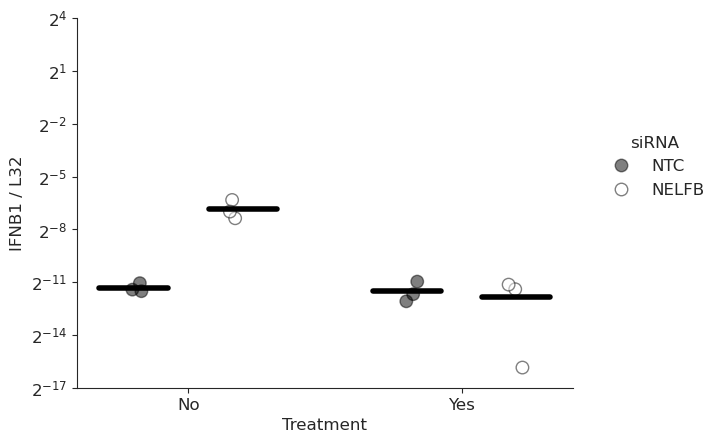

In [23]:
graph = data[data.Cells == 'RKO']
order = ['No','Yes']
ax=sns.stripplot(x='Baloxavir', y='IFNB1/L32', data=graph,  edgecolor='black', order = order,
            jitter=True, dodge=True, linewidth=1, s=9, hue='siRNA', hue_order=['NTC','NELFB'], palette = ['0','1'], alpha = 0.5)

sns.despine()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:2], ['NTC', 'NELFB'], bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.,frameon=False, title='siRNA')

plt.ylabel('IFNB1 / L32')
plt.xlabel('Treatment')
a =plt.xticks(np.arange(0,2,1), order)
plt.yscale('log', base=2)

pvals = []
for position, treat in enumerate(order):
    curr = graph[graph['Baloxavir'] == treat]
    tstat, pval = stats.ttest_ind(curr[curr.siRNA == 'NELFB']['IFNB1/L32'], curr[curr.siRNA == 'NTC']['IFNB1/L32'])
    pvals = pvals + [pval]
    print(treat)
    print(pval)
    y = curr[curr.siRNA == 'NTC']['IFNB1/L32'].mean()
    print(y)
    plt.plot([position-0.325, position-0.075], [y, y], lw=4, c='k', zorder=9)
    y = curr[curr.siRNA == 'NELFB']['IFNB1/L32'].mean()
    print(y)
    plt.plot([position+0.075, position+0.325], [y, y], lw=4, c='k', zorder=9)
pvals = multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
print(pvals)

plt.ylim(2**(-17),2**(4))
plt.savefig('Figures/RIGI_RKO_Balox_NS1stop_IFNB1.pdf', format='pdf', bbox_inches = "tight")

In [ ]:
graph = data[data.Cells == 'RKO']
order = ['No','Yes']
ax=sns.stripplot(x='Baloxavir', y='NELFB/L32', data=graph,  edgecolor='black', order = order,
            jitter=True, dodge=True, linewidth=1, s=9, hue='siRNA', hue_order=['NTC','NELFB'], palette = ['0','1'], alpha = 0.5)

sns.despine()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:2], ['NTC', 'NELFB'], bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.,frameon=False, title='siRNA')

plt.ylabel('NELFB / L32')
plt.xlabel('Treatment')
a =plt.xticks(np.arange(0,2,1), order)
plt.yscale('log', base=2)

pvals = []
for position, treat in enumerate(order):
    curr = graph[graph['Baloxavir'] == treat]
    tstat, pval = stats.ttest_ind(curr[curr.siRNA == 'NELFB']['NELFB/L32'], curr[curr.siRNA == 'NTC']['NELFB/L32'])
    pvals = pvals + [pval]
    print(treat)
    print(pval)
    y = curr[curr.siRNA == 'NTC']['NELFB/L32'].mean()
    plt.plot([position-0.325, position-0.075], [y, y], lw=4, c='k', zorder=9)
    print(y)
    y = curr[curr.siRNA == 'NELFB']['NELFB/L32'].mean()
    print(y)
    plt.plot([position+0.075, position+0.325], [y, y], lw=4, c='k', zorder=9)
pvals = multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
print(pvals)

plt.ylim(2**(-7),2**(-1))
plt.savefig('Figures/RIGI_RKO_Balox_NS1stop_NELFB.pdf', format='pdf', bbox_inches = "tight")

In [25]:
data = pd.read_csv(dataDirectory + '240918_BaloxavirPimodivir.csv')
data = data.groupby(['treatment','replicate']).mean().reset_index()
data['HA_Cq'] = data['L32'] - data['HA']
data['HA/L32'] = 2**data['HA_Cq']
data['IFNB1_Cq'] = data['L32'] - data['IFNB1']
data['IFNB1/L32'] = 2**data['IFNB1_Cq']
data

,treatment,replicate,L32,HA,IFNB1,HA_Cq,HA/L32,IFNB1_Cq,IFNB1/L32
0,inf_baloxavir,1,20.342237,18.929664,28.116487,1.412573,2.662115,-7.774250,0.004568
1,inf_baloxavir,2,17.786031,16.696612,26.401669,1.089419,2.127884,-8.615638,0.002549
2,inf_baloxavir,3,17.912891,16.503000,26.243209,1.409891,2.657171,-8.330317,0.003107
3,inf_pimodivir,1,17.838387,16.644052,27.516034,1.194335,2.288393,-9.677647,0.001221
4,inf_pimodivir,2,18.041421,16.653665,28.361742,1.387757,2.616715,-10.320321,0.000782
5,inf_pimodivir,3,17.843627,16.411957,27.491962,1.431670,2.697589,-9.648335,0.001246
6,infected,1,18.197555,11.400189,24.237046,6.797367,111.227283,-6.039490,0.015203
7,infected,2,18.293013,11.533725,24.018826,6.759288,108.329944,-5.725813,0.018896
8,infected,3,18.189874,11.861306,24.098616,6.328569,80.369089,-5.908742,0.016645
9,uninfected,1,17.793250,35.207336,29.431444,-17.414086,0.000006,-11.638195,0.000314


/tmp/ipykernel_1823236/2246009073.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='HA/L32', x='treatment', data=graph, palette = ['0.5'], edgecolor='0',
/tmp/ipykernel_1823236/2246009073.py:6: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(y='HA/L32', x='treatment', data=graph, palette = ['0.5'], edgecolor='0',


infected
0.000528216150210192
inf_baloxavir
0.00015082897139699332
inf_baloxavir
0.0005825991203742648
inf_pimodivir
3.507586129039004e-05
inf_pimodivir
0.0005836154720608508
(array([ True,  True,  True,  True,  True]), array([0.00058362, 0.00037707, 0.00058362, 0.00017538, 0.00058362]), 0.010206218313011495, 0.01)


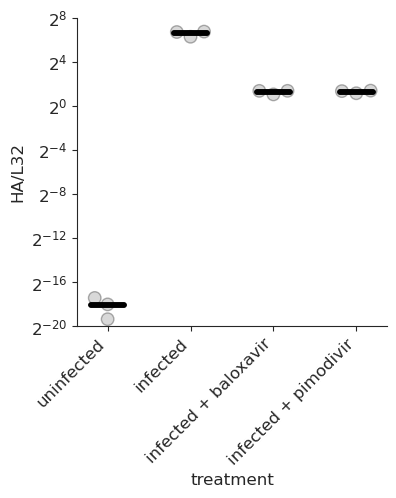

In [29]:
graph = data
fig, ax = plt.subplots(1,1,figsize=[4,4])
order = ['uninfected', 'infected', 'inf_baloxavir', 'inf_pimodivir']
displayNames=['uninfected', 'infected', 'infected + baloxavir', 'infected + pimodivir']

sns.swarmplot(y='HA/L32', x='treatment', data=graph, palette = ['0.5'], edgecolor='0',        
                dodge=False, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.3)

sns.despine()
a = plt.xticks(np.arange(0,4,1), displayNames, rotation=45, ha='right')
a = plt.ylabel('HA/L32')
plt.yscale('log', base=2)


plt.ylim(2**(-20),2**(8))

pvals = []
for position, treatment, in enumerate(order):
    if position > 0:
        tstat, pval = stats.ttest_ind(graph[graph.treatment == treatment]['HA/L32'], data[data.treatment == 'uninfected']['HA/L32'])
        pvals += [pval]
        print(treatment)
        print(pval)
    if position > 1:
        tstat, pval = stats.ttest_ind(data[data.treatment == treatment]['HA/L32'], data[data.treatment == 'infected']['HA/L32'])
        pvals += [pval]
        print(treatment)
        print(pval)
    y = data[data.treatment == order[position]]['HA/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)
pvals = multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
print(pvals)

for position, treat, in enumerate(order):
    y = graph[graph.treatment == order[position]]['HA/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)
    
plt.savefig(figureDirectory + 'baloxavir_pimodivir_HA.pdf', bbox_inches="tight")

/tmp/ipykernel_1823236/3385220796.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='IFNB1/L32', x='treatment', data=graph, palette = ['0.5'], edgecolor='0',
/tmp/ipykernel_1823236/3385220796.py:6: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(y='IFNB1/L32', x='treatment', data=graph, palette = ['0.5'], edgecolor='0',


infected
0.00010040941393214528
inf_baloxavir
0.0061287319230176095
inf_baloxavir
0.0003926132546395013
inf_pimodivir
0.005427428642206085
inf_pimodivir
0.00012827122749318616
(array([ True,  True,  True,  True,  True]), array([0.00032068, 0.00612873, 0.00065436, 0.00612873, 0.00032068]), 0.010206218313011495, 0.01)


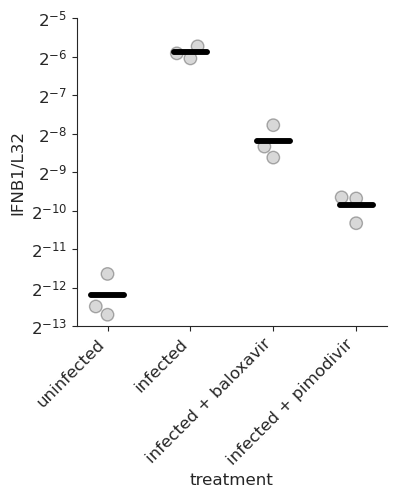

In [30]:
graph = data
fig, ax = plt.subplots(1,1,figsize=[4,4])
order = ['uninfected', 'infected', 'inf_baloxavir', 'inf_pimodivir']
displayNames=['uninfected', 'infected', 'infected + baloxavir', 'infected + pimodivir']

sns.swarmplot(y='IFNB1/L32', x='treatment', data=graph, palette = ['0.5'], edgecolor='0',        
                dodge=False, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.3)

sns.despine()
a = plt.xticks(np.arange(0,4,1), displayNames, rotation=45, ha='right')
a = plt.ylabel('IFNB1/L32')
plt.yscale('log', base=2)


plt.ylim(2**(-13),2**(-5))

pvals = []
for position, treatment, in enumerate(order):
    if position > 0:
        tstat, pval = stats.ttest_ind(graph[graph.treatment == treatment]['IFNB1/L32'], data[data.treatment == 'uninfected']['IFNB1/L32'])
        pvals += [pval]
        print(treatment)
        print(pval)
    if position > 1:
        tstat, pval = stats.ttest_ind(data[data.treatment == treatment]['IFNB1/L32'], data[data.treatment == 'infected']['IFNB1/L32'])
        pvals += [pval]
        print(treatment)
        print(pval)
    y = data[data.treatment == order[position]]['IFNB1/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)
pvals = multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
print(pvals)

for position, treat, in enumerate(order):
    y = graph[graph.treatment == order[position]]['IFNB1/L32'].mean()
    plt.plot([position-0.2, position+0.2], [y, y], lw=4, c='k', zorder=9)
    
plt.savefig(figureDirectory + 'baloxavir_pimodivir_IFNB1.pdf', bbox_inches="tight")

In [32]:
data = pd.read_csv(dataDirectory + '240125_CHX-Baloxavir.csv')
data = data.groupby(['CHX','Baloxavir','Replicate']).mean().reset_index()
data['HA_Cq'] = data['L32'] - data['HA']
data['HA/L32'] = 2**data['HA_Cq']
data['IFNB1_Cq'] = data['L32'] - data['IFNB1']
data['IFNB1/L32'] = 2**data['IFNB1_Cq']
data

,CHX,Baloxavir,Replicate,IFNB1,HA,L32,HA_Cq,HA/L32,IFNB1_Cq,IFNB1/L32
0,No,No,1,24.065078,14.123091,21.762013,7.638922,199.317158,-2.303065,0.202632
1,No,No,2,24.087493,14.558738,21.807544,7.248806,152.092609,-2.279949,0.205905
2,No,No,3,23.831766,14.040907,22.149946,8.109038,276.098294,-1.681820,0.311689
3,No,Yes,1,29.171424,22.254390,21.712869,-0.541521,0.687046,-7.458555,0.005685
4,No,Yes,2,29.085037,22.357684,21.847563,-0.510121,0.702164,-7.237473,0.006627
5,No,Yes,3,32.906305,34.965445,21.786265,-13.179180,0.000108,-11.120040,0.000449
6,Yes,No,1,19.853687,19.141858,20.818647,1.676789,3.197156,0.964960,1.952009
7,Yes,No,2,20.318974,19.641526,20.921375,1.279848,2.428135,0.602401,1.518241
8,Yes,No,3,19.321154,18.947271,20.838647,1.891376,3.709888,1.517493,2.862931
9,Yes,Yes,1,23.016499,21.409310,21.024229,-0.385081,0.765736,-1.992271,0.251343


No
0.0044624881156337575
Yes
0.003008359475359677
(array([ True,  True]), array([0.00446249, 0.00446249]), 0.025320565519103555, 0.025)


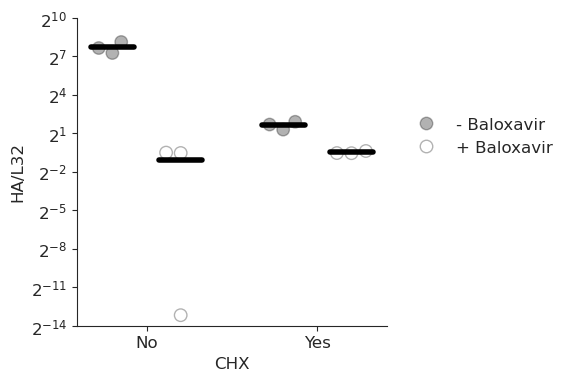

In [33]:
graph = data
fig, ax = plt.subplots(1,1,figsize=[4,4])
order = ['No', 'Yes']

sns.swarmplot(y='HA/L32', x='CHX', data=graph, palette = ['0','1'], hue = 'Baloxavir', edgecolor='0',        
                dodge=True, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.3)

sns.despine()
a = plt.ylabel('HA/L32')
plt.yscale('log', base=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:2], ['- Baloxavir','+ Baloxavir'], bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.,frameon=False)


plt.ylim(2**(-14),2**(10))

#stats!
pvals = []
for position, treat, in enumerate(order):
    curr = graph[graph.CHX == treat]
    tstat, pval = stats.ttest_ind(curr[curr.Baloxavir == 'Yes']['HA/L32'], curr[curr.Baloxavir == 'No']['HA/L32'])
    pvals += [pval]
    print(treat)
    print(pval)
    y = curr[curr.Baloxavir == 'No']['HA/L32'].mean()
    plt.plot([position-0.325, position-0.075], [y, y], lw=4, c='k', zorder=9)
    y = curr[curr.Baloxavir == 'Yes']['HA/L32'].mean()
    plt.plot([position+0.075, position+0.325], [y, y], lw=4, c='k', zorder=9)
pvals = multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
print(pvals)   

plt.savefig(figureDirectory + 'CHX_Baloxavir_HA.pdf', bbox_inches="tight")

No
0.0027707333852265395
Yes
0.01069378098640546
(array([ True,  True]), array([0.00554147, 0.01069378]), 0.025320565519103555, 0.025)


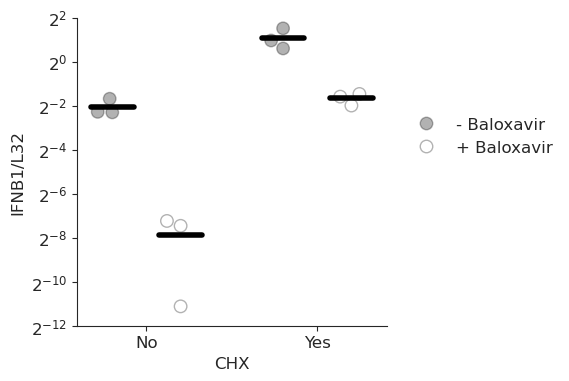

In [34]:
graph = data
fig, ax = plt.subplots(1,1,figsize=[4,4])
order = ['No', 'Yes']

sns.swarmplot(y='IFNB1/L32', x='CHX', data=graph, palette = ['0','1'], hue = 'Baloxavir', edgecolor='0',        
                dodge=True, linewidth=1, s=9,   zorder=5, order=order, ax=ax, alpha=0.3)

sns.despine()
a = plt.ylabel('IFNB1/L32')
plt.yscale('log', base=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:2], ['- Baloxavir','+ Baloxavir'], bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.,frameon=False)


plt.ylim(2**(-12),2**(2))

pvals = []
for position, treat, in enumerate(order):
    curr = graph[graph.CHX == treat]
    tstat, pval = stats.ttest_ind(curr[curr.Baloxavir == 'Yes']['IFNB1/L32'], curr[curr.Baloxavir == 'No']['IFNB1/L32'])
    pvals += [pval]
    print(treat)
    print(pval)
    y = curr[curr.Baloxavir == 'No']['IFNB1/L32'].mean()
    plt.plot([position-0.325, position-0.075], [y, y], lw=4, c='k', zorder=9)
    y = curr[curr.Baloxavir == 'Yes']['IFNB1/L32'].mean()
    plt.plot([position+0.075, position+0.325], [y, y], lw=4, c='k', zorder=9)
pvals = multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
print(pvals)   

plt.savefig(figureDirectory + 'CHX_Baloxavir_IFNB1.pdf', bbox_inches="tight")